<a href="https://colab.research.google.com/github/etwalsaado/Student_Infineon_Projects/blob/main/03_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✨ Notebook جاهز للتشغيل!
⚡ cleaned.csv غير موجود → إنشاء بيانات تجريبية
✔ تم إنشاء cleaned.csv


,date,consumption,temp
0,2020-01-01,51.58,19.80
1,2020-01-02,48.87,16.48
2,2020-01-03,50.31,19.95
3,2020-01-04,54.33,20.59
4,2020-01-05,49.59,19.04



📊 تقييم النموذج:
- MSE: 22.12
- R2: 0.64


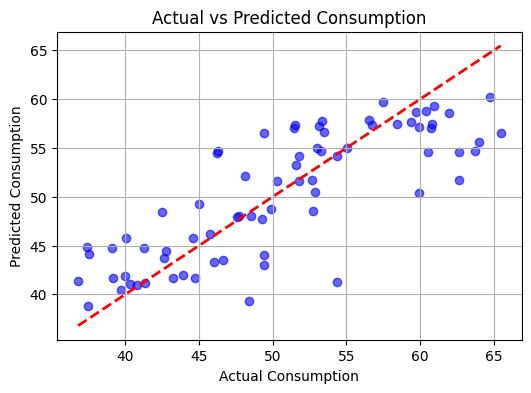

In [4]:
# 03_energy_prediction.ipynb - جاهز للعمل بدون تعليق
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

print("✨ Notebook جاهز للتشغيل!")

# --------------------------------------
# خطوة 1: التأكد من وجود cleaned.csv أو إنشاء بيانات تجريبية
import os

if not os.path.exists('cleaned.csv'):
    print("⚡ cleaned.csv غير موجود → إنشاء بيانات تجريبية")
    dates = pd.date_range(start='2020-01-01', periods=365, freq='D')
    consumption = 50 + 10*np.sin(2*np.pi*dates.dayofyear/365) + np.random.normal(0,3,size=len(dates))
    temp = 20 + 5*np.sin(2*np.pi*dates.dayofyear/365) + np.random.normal(0,2,size=len(dates))
    df = pd.DataFrame({'date': dates, 'consumption': consumption.round(2), 'temp': temp.round(2)})
    df.to_csv('cleaned.csv', index=False)
    print("✔ تم إنشاء cleaned.csv")
else:
    print("✔ cleaned.csv موجود بالفعل")

# --------------------------------------
# خطوة 2: قراءة الملف
df = pd.read_csv('cleaned.csv', parse_dates=['date'])
display(df.head())

# --------------------------------------
# خطوة 3: Feature Engineering
df['dayofyear'] = df['date'].dt.dayofyear
X = df[['dayofyear', 'temp']]
y = df['consumption']

# --------------------------------------
# خطوة 4: تقسيم البيانات وتدريب النموذج
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# --------------------------------------
# خطوة 5: التنبؤ وتقييم النموذج
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"\n📊 تقييم النموذج:\n- MSE: {mse:.2f}\n- R2: {r2:.2f}")

# --------------------------------------
# خطوة 6: رسم Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Actual vs Predicted Consumption')
plt.grid(True)
plt.show()
